# Violent attacks against refugees in Germany

## Introduction

Anti-refugee attacks in the Federal Republic of Germany, including direct verbal and physical crimes against refugees, refugee shelters and facilities for asylum seekers, have strongly increased since the refugee crisis in Europe in 2015. This post was inspired by a similar project: https://vis.one/rechte-gewalt/.

## 1. Scraping "Chronik flüchtlingsfeindlicher Vorfälle"

### Setup

Modules to be loaded are numpy and pandas for handling the data, requests-html for scraping the website, as well as seaborn for plotting.

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from requests_html import HTMLSession

### Prepare the scraper

First thing to do is to establish a html session to the website.

In [3]:
session = HTMLSession()
r = session.get('https://www.mut-gegen-rechte-gewalt.de/service/chronik-vorfaelle')

Next, we define the urls to be scraped. In total, there are 903 sites, the first one without a suffix, later on with a suffix indicating the site number which makes it straightforward to set the full urls.

In [4]:
# Initialize lists
suffixes = [''] 
urls = []

# Set suffix of url
for i in range(1, 902):
    suffixes.append('?page=' + str(i))

# Set full urls
for suffix in suffixes:
    urls.append('https://www.mut-gegen-rechte-gewalt.de/service/chronik-vorfaelle' + suffix)

Let's print the first five urls to check if it worked out.

In [5]:
print(*urls[0:5], sep='\n')

https://www.mut-gegen-rechte-gewalt.de/service/chronik-vorfaelle
https://www.mut-gegen-rechte-gewalt.de/service/chronik-vorfaelle?page=1
https://www.mut-gegen-rechte-gewalt.de/service/chronik-vorfaelle?page=2
https://www.mut-gegen-rechte-gewalt.de/service/chronik-vorfaelle?page=3
https://www.mut-gegen-rechte-gewalt.de/service/chronik-vorfaelle?page=4


The urls look fine, now we ready to launch the scraper. It loops over every entry and scrapes information on each of the respective fields. If there is no information on a variable in a certain entry, the value None is assigned.

In [6]:
data = []

for n in urls:
    
    r = session.get(n)
    
    for element in r.html.find('.node-chronik-eintrag'):

        if element.find('.field-name-field-date', first = True) == None:
            date = None
        else:
            date = element.find('.field-name-field-date', first = True).text

        if element.find('.field-name-field-art', first = True) == None:
            category = None
        else:
            category = element.find('.field-name-field-art', first = True).text

        if element.find('.field-name-field-anzahl-verletze', first = True) == None:
            casualties = None 
        else:
            casualties = element.find('.field-name-field-anzahl-verletze', first = True).text               

        if element.find('.field-name-field-city', first = True) == None:
            city = None 
        else:
            city = element.find('.field-name-field-city', first = True).text

        if element.find('.field-name-field-bundesland', first = True) == None:
            bundesland = None        
        else:
            bundesland = element.find('.field-name-field-bundesland', first = True).text
        
        if element.find('a[href^="http"]', first = True) == None:
            source = None 
        else:
            source = element.find('a[href^="http"]', first = True).text
        
        if element.find('a[href^="http"]', first = True) == None:
            source_url = None 
        else:
            source_url = element.find('a[href^="http"]', first = True).links
        
        if element.find('.group-right', first = True) == None:
            description = None  
        else:
            description = element.find('.group-right', first = True).text
            
        data.append({'date': date, 
                     'category': category, 
                     'casualties': casualties, 
                     'city': city, 
                     'bundesland': bundesland,
                     'source': source, 
                     'source_url': source_url, 
                     'description': description})

Let's print the first three records to take a look at the scraping output.

In [7]:
print(*data[0:3], sep='\n')

{'date': '17.05.2019', 'category': 'Tätlicher Übergriff/Körperverletzung', 'casualties': '1Verletzte_r', 'city': 'Prenzlau', 'bundesland': 'Brandenburg', 'source': 'Nordkurier', 'source_url': {'https://www.nordkurier.de/uckermark/junge-maenner-in-prenzlau-randalieren-1935542005.html'}, 'description': 'Zwei Deutsche haben am Abend zunächst neben einer Asylunterkunft randaliert. Als Kinder, die in der Asylunterkunft leben, sie aufforderten, dies zu unterlassen, betraten die beiden 21- bzw. 23-Jährigen das Gelände der Unterkunft. Einer von ihnen zückte ein Messer und soll laut Polizei "Stichbewegungen gegen einen tschetschenischen Bewohner ausgeführt haben. Bei der folgenden Rangelei verletzte sich der Tschetschene an der Hand, ein Deutscher erlitt Verletzungen am Bein und musste operiert werden", so die Polizei weiter. Die Kriminalpolizei ermittelt.'}
{'date': '04.05.2019', 'category': 'Tätlicher Übergriff/Körperverletzung', 'casualties': None, 'city': 'Querfurt', 'bundesland': 'Sachsen-

### Turn into a dataframe and save as csv file

We use pandas methods to turn the data records into a data frame and to save it as a csv file:

In [8]:
cols = ['date', 'category', 'city', 'bundesland', 'casualties', 'description', 'source', 'source_url']
df = pd.DataFrame.from_records(data, columns=cols)
df.to_csv('data/mut_gegen_rechte_gewalt.csv', index=False)

## 2. Data wrangling and exploration

Get a first overview of the data.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9012 entries, 0 to 9011
Data columns (total 8 columns):
date           9012 non-null object
category       9012 non-null object
city           9012 non-null object
bundesland     9012 non-null object
casualties     611 non-null object
description    9012 non-null object
source         8258 non-null object
source_url     8259 non-null object
dtypes: object(8)
memory usage: 563.3+ KB


In [4]:
df.head()

,date,category,city,bundesland,casualties,description,source,source_url
0,17.05.2019,Tätlicher Übergriff/Körperverletzung,Prenzlau,Brandenburg,1Verletzte_r,Zwei Deutsche haben am Abend zunächst neben ei...,Nordkurier,{'https://www.nordkurier.de/uckermark/junge-ma...
1,04.05.2019,Tätlicher Übergriff/Körperverletzung,Querfurt,Sachsen-Anhalt,NaN,Ein 21-jähriger aus Syrien wurde in der Nacht ...,Mitteldeutsche Zeitung,{'https://www.mz-web.de/saalekreis/staatsschut...
2,01.05.2019,Sonstige Angriffe,Kirchheim,Hessen,NaN,Unbekannte haben in der Nacht Eier gegen die F...,Süddeutsche Zeitung,{'https://www.sueddeutsche.de/muenchen/staatss...
3,31.03.2019,Verdachtsfall,Lübeck,Schleswig-Holstein,1Verletzte_r,Zwei unbekannte Männer haben einen 27-jährigen...,n-tv,{'https://www.n-tv.de/regionales/hamburg-und-s...
4,02.03.2019,Tätlicher Übergriff/Körperverletzung,Leipzig,Sachsen,1Verletzte_r,Eine Gruppe von acht Männern hat am Nachmittag...,Peiner Allgemeine,{'http://www.paz-online.de/Nachrichten/Panoram...


### Data cleaning

In [5]:
df.dtypes

date           object
category       object
city           object
bundesland     object
casualties     object
description    object
source         object
source_url     object
dtype: object

All columns are of the type "object". The least we should do is to turn the date column into a datetime object. In the following steps, each column will be inspected and treated one by one.

#### Date

Change date column to datetime object.

In [6]:
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')

#### Category

In [7]:
df['category'].value_counts()

Sonstige Angriffe                       6611
Tätlicher Übergriff/Körperverletzung    1482
Kundgebung/Demo                          361
Verdachtsfall                            286
Brandanschlag                            272
Name: category, dtype: int64

As the data has been scraped from a German website, the five category names are in German. We will replace the German categories with the English translation.

In [8]:
mapping_dict = {
    'Tätlicher Übergriff/Körperverletzung': 'Assault and battery',
    'Brandanschlag': 'Arson attack',
    'Kundgebung/Demo': 'Rally/demonstration',
    'Sonstige Angriffe': 'Other attacks',
    'Verdachtsfall': 'Suspected case'
}
df['category'] = df['category'].map(mapping_dict)
df['category'].value_counts()

#### City

In [10]:
df['city'].unique().shape[0]

2505

There are 2505 unique places in Germany where an attack on refugees occured.

In [11]:
df['city'].unique()[0:20]

array(['Prenzlau', 'Querfurt', 'Kirchheim', 'Lübeck', 'Leipzig',
       'Ahrensburg', 'Marzahn, Berlin', 'Zittau', 'Mühlhausen',
       'Plattling', 'Stralsund', 'Hebsack, Remshalden',
       'Vaihingen an der Enz', 'Lütten-Klein, Rostock', 'Spremberg',
       'Neubrandenburg', 'Bad Oeynhausen', 'Cottbus', 'Düsseldorf',
       'Magdeburg'], dtype=object)

#### Bundesland

In [12]:
df['bundesland'].unique().shape[0]

16

In [13]:
df['bundesland'].unique()

array(['Brandenburg', 'Sachsen-Anhalt', 'Hessen', 'Schleswig-Holstein',
       'Sachsen', 'Berlin', 'Thüringen', 'Bayern',
       'Mecklenburg-Vorpommern', 'Baden-Württemberg',
       'Nordrhein-Westfalen', 'Niedersachsen', 'Rheinland-Pfalz',
       'Saarland', 'Hamburg', 'Bremen'], dtype=object)

#### Casualties

In [14]:
df['casualties'].head()

0    1Verletzte_r
1             NaN
2             NaN
3    1Verletzte_r
4    1Verletzte_r
Name: casualties, dtype: object

The information is inherently numeric but it is concatenated as a string representation. Let's replace the string representation into numerical values by deleting the characters.

In [ ]:
df['casualties'] = df['casualties'].str.replace(r' ?(Verletzte)(_r)?', '').astype(float)
df['casualties'].head()

How many entries actually do contain casualty numbers?

In [15]:
df[df['casualties'].notnull()].shape[0]

611

There are only 611 entries which contain information on the number of casualties. I suppose this can be interpreted than in other cases there were (luckily) no casualties. 

#### Description

In [18]:
print(*df['description'].head(3), sep='\n\n')

Zwei Deutsche haben am Abend zunächst neben einer Asylunterkunft randaliert. Als Kinder, die in der Asylunterkunft leben, sie aufforderten, dies zu unterlassen, betraten die beiden 21- bzw. 23-Jährigen das Gelände der Unterkunft. Einer von ihnen zückte ein Messer und soll laut Polizei "Stichbewegungen gegen einen tschetschenischen Bewohner ausgeführt haben. Bei der folgenden Rangelei verletzte sich der Tschetschene an der Hand, ein Deutscher erlitt Verletzungen am Bein und musste operiert werden", so die Polizei weiter. Die Kriminalpolizei ermittelt.

Ein 21-jähriger aus Syrien wurde in der Nacht aus einer Gruppe aus fünf oder sechs jungen Deutschen zunächst rassistisch beleidigt und dann auch geschlagen. Als ein 47-jähriger Zeuge dazwischengehen wollte, sollen ihn die Angreifer zurückgestoßen und am Fuß verletzt haben. Der 21-Jährige musste nicht behandelt werden. Die Täter flüchteten, der Staatsschutz ermittelt.

Unbekannte haben in der Nacht Eier gegen die Fassade einer Asylunterkun

#### Source

In [20]:
df['source'].unique().shape[0]

596

In [21]:
df['source'].value_counts()[0:10]

Antwort auf eine Kleine Anfrage im Bundestag (Drucksache 18/11298)          1957
Antwort auf eine Kleine Anfrage im Bundestag (Drucksache 18/10213)           762
Bundesregierung                                                              662
Antwort der Bundesregierung (Drucksache 19/144)                              478
Antwort der Bundesregierung (Drucksache 19/146)                              417
Antwort der Bundesregierung auf eine Kleine Anfrage (Drucksache 19/889)      352
Antwort der Bundesregierung auf eine Kleine Anfrage (Drucksache 19/3753)     329
Antwort der Bundesregierung auf eine Kleine Anfrage (Drucksache 19/5516)     324
Antwort der Bundesregierung auf eine Kleine Anfrage (Drucksache 19/2490)     315
Antwort auf eine Kleine Anfrage im Bundestag (Drucksache 19/889)             234
Name: source, dtype: int64

There are 596 different sources, but the most common ones are related to answers from the Bundesregierung. A further inspection reveals that events documented are quite common, too. Therefore we will categorize the variable source into three categories: government, police, others. 

In [22]:
# Initialise column
df['source_category'] = df['source']

# Replace null values by empty string (otherwise boolean indexing will throw an arrow because of boolean indexing)
df.loc[pd.isnull(df['source_category']), 'source_category'] = ''

# Replace respective values
df.loc[df['source_category'].str.contains(r'Anfrage|Bundesregierung'), 'source_category'] = 'government'
df.loc[df['source_category'].str.contains(r'[Pp]olizei'), 'source_category'] = 'police'
df.loc[~df['source_category'].str.contains(r'government|police|^$'), 'source_category'] = 'other'

# Replace null values by empty string
df.loc[df['source_category'] == '', 'source_category'] = ''

In [23]:
df['source_category'].value_counts(dropna = False)

government    6287
other         1683
               754
police         288
Name: source_category, dtype: int64

Out of all sources, the vast amount belong to governmental reports (6,287), and a considerate amount to police reports (288). The category "other" includes mostly media and NGOs. Around 10% of the events do not contain information on the source. 

#### Source url

In [24]:
print(*df['source_url'].head(), sep='\n')

{'https://www.nordkurier.de/uckermark/junge-maenner-in-prenzlau-randalieren-1935542005.html'}
{'https://www.mz-web.de/saalekreis/staatsschutz-ermittelt-junger-syrer-rassistisch-beschimpft-und-attackiert-32472432'}
{'https://www.sueddeutsche.de/muenchen/staatsschutz-ermittelt-angriffe-auf-fluechtlinge-und-ein-drohbrief-1.4429977'}
{'https://www.n-tv.de/regionales/hamburg-und-schleswig-holstein/Syrer-mit-Glasflasche-attackiert-Fremdenfeindliches-Motiv-article20957339.html'}
{'http://www.paz-online.de/Nachrichten/Panorama/Auslaenderfeindlicher-Attacke-Acht-betrunkene-Maenner-verpruegeln-Asylbewerber'}


Delete the curly brackets:

In [ ]:
df['source_url'] = df['source_url'].str.replace(r"(\{')?('\})?", '')
print(*df['source_url'].head(), sep='\n')

### Final checkup

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9012 entries, 0 to 9011
Data columns (total 9 columns):
date               9012 non-null datetime64[ns]
category           9012 non-null object
city               9012 non-null object
bundesland         9012 non-null object
casualties         611 non-null float64
description        9012 non-null object
source             8258 non-null object
source_url         8259 non-null object
source_category    9012 non-null object
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 633.7+ KB


In [28]:
df.dtypes

date               datetime64[ns]
category                   object
city                       object
bundesland                 object
casualties                float64
description                object
source                     object
source_url                 object
source_category            object
dtype: object

In [29]:
df.head()

,date,category,city,bundesland,casualties,description,source,source_url,source_category
0,2019-05-17,Assault and battery,Prenzlau,Brandenburg,1.0,Zwei Deutsche haben am Abend zunächst neben ei...,Nordkurier,https://www.nordkurier.de/uckermark/junge-maen...,other
1,2019-05-04,Assault and battery,Querfurt,Sachsen-Anhalt,NaN,Ein 21-jähriger aus Syrien wurde in der Nacht ...,Mitteldeutsche Zeitung,https://www.mz-web.de/saalekreis/staatsschutz-...,other
2,2019-05-01,Other attacks,Kirchheim,Hessen,NaN,Unbekannte haben in der Nacht Eier gegen die F...,Süddeutsche Zeitung,https://www.sueddeutsche.de/muenchen/staatssch...,other
3,2019-03-31,Suspected case,Lübeck,Schleswig-Holstein,1.0,Zwei unbekannte Männer haben einen 27-jährigen...,n-tv,https://www.n-tv.de/regionales/hamburg-und-sch...,other
4,2019-03-02,Assault and battery,Leipzig,Sachsen,1.0,Eine Gruppe von acht Männern hat am Nachmittag...,Peiner Allgemeine,http://www.paz-online.de/Nachrichten/Panorama/...,other


### Additional data

#### Population by Bundesland (for standardization) 

In order to standardize the absolute number of attacks in a Bundesland by the population, we will merge official data from the Federal Statistical Office of Germany (source: https://www-genesis.destatis.de/genesis/online).

In [30]:
pop = pd.read_csv('data/12411-0010.csv', 
                 sep=";", 
                 skiprows=6, 
                 nrows=16,
                 header=None, 
                 encoding="cp1250",
                 names=['bundesland', 'population'])
df.sort_values('bundesland')['bundesland'].unique()

In [32]:
pop['bundesland']

0          Baden-Württemberg
1                     Bayern
2                     Berlin
3                Brandenburg
4                     Bremen
5                    Hamburg
6                     Hessen
7     Mecklenburg-Vorpommern
8              Niedersachsen
9        Nordrhein-Westfalen
10           Rheinland-Pfalz
11                  Saarland
12                   Sachsen
13            Sachsen-Anhalt
14        Schleswig-Holstein
15                 Thüringen
Name: bundesland, dtype: object

In [33]:
df = df.merge(pop, on='bundesland', how='left')
df.info()

#### Official statistics on numbers of refugees

Furthermore, official statistics on the monthly number of refugees are included in the analysis. These numbers are published by the Federal Office for Migration and Refugees, unfortunately in PDF format. However, a local initiative from Munich turns these documents into machine readable csv documents and makes them available online: https://github.com/muc-fluechtlingsrat/bamf-asylgeschaeftsstatistik. Moreover, they via the Freedom of Information Act they got access to data from before 2017 which was not published by the Federal Office for Migration and Refugees. 

I obtained the data needed for this analysis with an R script (get it here). Here, we only need to load the data:

In [35]:
statistik = pd.read_csv('data/asylmonatszahlen.csv')
statistik.head()

The steps of preparing this data set for analysis are done in the following section.

## 3. Analysing the data from "Chronik flüchtlingsfeindlicher Vorfälle"

### Attacks over time

First, let's prepare the data from the "Chronik": aggregate by month (setting date as index) and count number of attacks.

In [3]:
df['date'] = pd.to_datetime(df['date'])
df_date = df.resample('M', on='date')[['date']].count()
df_date.index = df_date.index.strftime('%b %Y')
df_date.columns = ['n_attacks']
df_date.head()

,n_attacks
Jan 2015,78
Feb 2015,52
Mar 2015,77
Apr 2015,69
May 2015,76


Prepare the data on monthly number of refugees by formatting it like above.

In [4]:
statistik['date'] = pd.to_datetime(statistik['date'])
statistik = statistik.resample('M', on='date').sum()
statistik.index = statistik.index.strftime('%b %Y')
statistik.columns = ['n_refugees']
statistik.head()

,n_refugees
Jan 2015,25042
Feb 2015,26083
Mar 2015,32054
Apr 2015,27178
May 2015,25992


Merge both data sets:

In [5]:
combined = df_date.merge(statistik, how='left', left_index=True, right_index=True)
combined = combined.dropna()
combined.head()

,n_attacks,n_refugees
Jan 2015,78,25042.0
Feb 2015,52,26083.0
Mar 2015,77,32054.0
Apr 2015,69,27178.0
May 2015,76,25992.0


Finally, we are ready to plot the data:

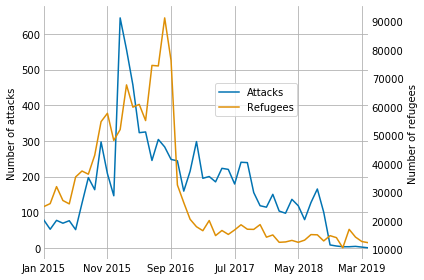

In [31]:
# Define plot
ax1 = combined['n_attacks'].plot(color = '#0173b2')
ax2 = plt.twinx()
combined['n_refugees'].plot(color='#de8f05', ax=ax2)
# Set grid lines
ax1.xaxis.grid(True)
ax1.yaxis.grid(True)
# Set labels
plt.title('')
ax1.set_ylabel('Number of attacks')
ax2.set_ylabel('Number of refugees')
# Turn axis ticks off
ax1.tick_params(axis=u'both', which=u'both',length=0)
ax2.tick_params(axis=u'both', which=u'both',length=0)
# Set legend
ax1.set_label('lkmkl')
legend = ax1.figure.legend(loc='upper right', bbox_to_anchor=(0.7, 0.7))
legend.get_texts()[0].set_text('Attacks')
legend.get_texts()[1].set_text('Refugees')
# Avoid clipping of right y labels
plt.tight_layout()
# Remove frame 
sns.despine(top=True, right=True, left=True, bottom=True);

### Attacks by Bundesland

Group the number of attacks by Bundesland:

In [7]:
df_bundesland = df.groupby('bundesland').size().reset_index(name='n').sort_values('n', ascending=False)
df_bundesland

,bundesland,n
12,Sachsen,1406
1,Bayern,1057
9,Nordrhein-Westfalen,968
3,Brandenburg,930
0,Baden-Württemberg,803
2,Berlin,701
8,Niedersachsen,642
13,Sachsen-Anhalt,539
15,Thüringen,486
14,Schleswig-Holstein,398


Create a variable indicating if a Bundesland is in Eastern or Western Germany (for coloring in plot):

In [8]:
east = ['Brandenburg', 'Sachsen', 'Mecklenburg-Vorpommern', 'Sachsen-Anhalt', 'Thüringen', 'Berlin']
df_bundesland['east_west'] = df_bundesland['bundesland'].apply(lambda x: 'East' if x in east else 'West')
df_bundesland['east_west'].value_counts()

West    10
East     6
Name: east_west, dtype: int64

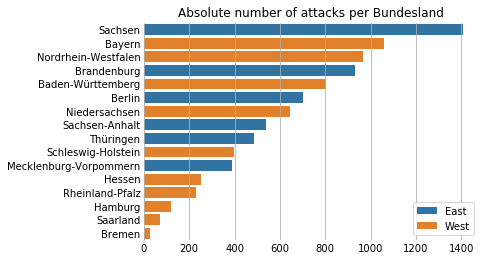

In [9]:
# Define plot
ax = plt.axes()
sns.barplot(x='n', y='bundesland', data=df_bundesland, hue='east_west', dodge=False)
# Set grid lines
ax.xaxis.grid(True)
# Set labels
plt.title('Absolute number of attacks per Bundesland')
plt.xlabel('')
plt.ylabel('')
# Remove legend title
plt.legend(title='')
# Turn axis ticks off
ax.tick_params(axis=u'both', which=u'both',length=0)
# Remove y axis ticks
ax.tick_params(left=False)
# Remove frame 
sns.despine(top=True, right=True, left=True, bottom=True);

### Attacks by Bundesland (standardized by population)

Compute standardized attack rate (100000 attacks per person):

In [10]:
pop_bundesland = df.groupby('population', as_index=False).first()[['bundesland', 'population']]
df_bundesland = df_bundesland.merge(pop_bundesland, on='bundesland', how='left')
df_bundesland['n_std'] = df_bundesland['n'] * 100000 / df_bundesland['population']
df_bundesland = df_bundesland.sort_values('n_std', ascending=False)

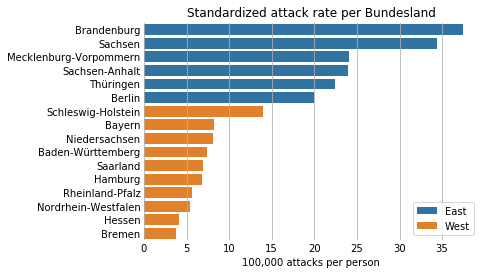

In [11]:
# Define plot
ax = plt.axes()
sns.barplot(x='n_std', y='bundesland', data=df_bundesland, hue='east_west', dodge=False)
# Set grid lines
ax.xaxis.grid(True)
# Set labels
plt.title('Standardized attack rate per Bundesland')
plt.xlabel('100,000 attacks per person')
plt.ylabel('')
# Remove legend title
plt.legend(title='')
# Turn axis ticks off
ax.tick_params(axis=u'both', which=u'both',length=0)
# Remove y axis ticks
ax.tick_params(left=False)
# Remove frame 
sns.despine(top=True, right=True, left=True, bottom=True);

### Attacks by category

In [12]:
df_category = df.groupby('category').size().reset_index(name='n').sort_values('n', ascending=False)
df_category

,category,n
2,Other attacks,6611
1,Assault and battery,1482
3,Rally/demonstration,361
4,Suspected case,286
0,Arson attack,272


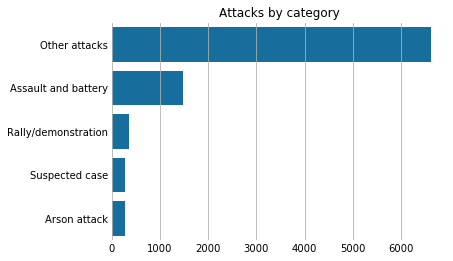

In [32]:
# Define plot
ax = plt.axes()
sns.barplot(x='n', y='category', data=df_category, color='#0173b2')
# Set grid lines
ax.xaxis.grid(True)
# Set labels
plt.title('Attacks by category')
plt.xlabel('')
plt.ylabel('')
# Turn axis ticks off
ax.tick_params(axis=u'both', which=u'both',length=0)
# Remove frame 
sns.despine(top=True, right=True, left=True, bottom=True);

### Number of casualties

Absolute numbers:

In [14]:
df['casualties'].value_counts(dropna=False)

NaN     8401
1.0      473
2.0       88
3.0       27
4.0       12
6.0        3
5.0        3
9.0        1
35.0       1
7.0        1
20.0       1
14.0       1
Name: casualties, dtype: int64

Relative numbers:

In [15]:
df['casualties'].value_counts(normalize=True, dropna=False)

NaN     0.932202
1.0     0.052486
2.0     0.009765
3.0     0.002996
4.0     0.001332
6.0     0.000333
5.0     0.000333
9.0     0.000111
35.0    0.000111
7.0     0.000111
20.0    0.000111
14.0    0.000111
Name: casualties, dtype: float64

By far most of the events do not involve any casualties (more than 90%). In around 5% of the events, 1 Person was injured. There are as well three events, in which more than 10 people suffered from injuries. Let's check which event correspond to the event with the highest number of casualties:

In [ ]:
print(*df[df['casualties'] == 35]['description'])

## Conclusion